In [1]:
from selenium.webdriver.common.keys import Keys
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
from selenium import webdriver
import re
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import csv

In [3]:
comments, likes, views, hashtag, description = {}, {}, {}, {}, {}
count, lastImg = 0, 0

In [12]:
url = "https://www.instagram.com/bjp4india/"

# create a new Firefox session
driver = webdriver.Firefox()
driver.implicitly_wait(30)
driver.get(url)
actionChain = webdriver.ActionChains(driver)

In [13]:
close = driver.find_elements_by_class_name('dCJp8')[0]
close.click()

In [14]:
actionChain = webdriver.ActionChains(driver)
while len(likes) < 1000:
    img = driver.find_elements_by_class_name('v1Nh3')
    imgLen = len(img)
    i = 0
    while i < imgLen:
        if len(likes) >= 1000:
            break
        try:
            img = driver.find_elements_by_class_name('v1Nh3')
            imgLen = len(img)
            if lastImg:
                if lastImg == img[i-1]:
                    pass
                else:
                    for j in range(imgLen):
                        if lastImg == img[j]:
                            i = j+1
                            break
            actionChain = webdriver.ActionChains(driver)
            hover = actionChain.move_to_element(img[i])
            hover.perform()
            soup=BeautifulSoup(driver.page_source, 'html.parser')
            l = soup.find_all(class_='v1Nh3')
            index = str(re.findall('<a href="[/ \- _ $ % ? a-z A-Z 0-9]*">',str(l[i])))
            index = str(re.findall('/[/ \- _ $ % ? a-z A-Z 0-9]*/',index))
            soup=BeautifulSoup(driver.page_source, 'html.parser')
            l = soup.find_all('li', class_='-V_eO')
            if len(l) != 2:
                l = l[len(l)-2:len(l)]
            l1 = l[0].get_text()
            l2 = l[1].get_text()
            comments[index] = l2
            if 'Play' in str(l[0]):
                views[index] = l1
                try:
                    img1 = driver.find_elements_by_class_name('v1Nh3')[i]
                    img1.click()
                    time.sleep(1)
                    soup = BeautifulSoup(driver.page_source,"html.parser")
                    temp = soup.find_all(class_='C4VMK')
                    print(temp[0])
                    description[index] = temp[0]
                    desc = " "
                    for item in soup.findAll('a'):
                        desc= desc + " " + str(item.string)
                     
                    taglist = desc.split()
                    taglist = [x for x in taglist if x.startswith('#')]
                    hashtag[index] = taglist
                    v = driver.find_elements_by_class_name('vcOH2')[0]
                    v.click()
                    soup=BeautifulSoup(driver.page_source, 'html.parser')
                    likeTmp = soup.find(class_='vJRqr').text.strip('likes').strip()
                    likes[index] = likeTmp
                    close = driver.find_elements_by_class_name('ckWGn')[0]
                    close.click()                        
                except Exception as e:
                    close = driver.find_elements_by_class_name('ckWGn')[0]
                    close.click()
                    pass
            else :
                likes[index] = l1
                try:
                    img1 = driver.find_elements_by_class_name('v1Nh3')[i]
                    img1.click()
                    time.sleep(1)
                    soup = BeautifulSoup(driver.page_source,"html.parser")
                    temp = soup.find_all(class_='C4VMK')
                    print(temp[0])
                    description[index] = temp[0]
                    desc = " "
                    for item in soup.findAll('a'):
                        desc= desc + " " + str(item.string)
                    taglist = desc.split()
                    taglist = [x for x in taglist if x.startswith('#')]
                    hashtag[index] = taglist
                    print(taglist)
                    close = driver.find_elements_by_class_name('ckWGn')[0]
                    close.click()                        
                except Exception as e:
                    close = driver.find_elements_by_class_name('ckWGn')[0]
                    close.click()
                    pass
                views[index] = -1
            lastImg = img[i]
            i += 1
        except Exception as e:
#             print(e)
            actionChain = webdriver.ActionChains(driver)
            actionChain.key_down(Keys.PAGE_DOWN).key_up(Keys.PAGE_DOWN).perform()
            time.sleep(3)

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span class="Linkify">आइए देखते हैं, 'बंशीलाल जी का परिवार' भाग-1 में।<br/><br/>फटे मोजे से झांकते अंगूठों को कैसे छुपाते हैं बंशीलाल।<br/>आइए देखते हैं, 'बंशीलाल जी का परिवार' भाग-1 में।</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span class="Linkify">पूरा देश कह रहा है .... मैं भी चौकीदार हूँ।<br/><br/>वो एक अकेला चल पड़ा...मैं उसकी ही कतार हूं। पूरा देश कह रहा है .... मैं भी चौकीदार हूँ।</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Look at the fervour at PM Modi’s rally in Aligarh. It is no longer a wave, it is a tsunami!</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2>

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Vote for a New India. Come out in large numbers and <a href="/explore/tags/votekar/">#VoteKar</a>.</span></div>
['#BJP', '#governance', '#VoteKar']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>We appeal to every eligible voter to participate in this festival of democracy called elections by exercising your right to vote.<br/><br/>Make your vote count and vote wisely for a stronger and prosperous New India.</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span class="Linkify">A simple guide how to <a href="/explore/tags/votekar/">#VoteKar</a>.</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title=

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>चलो मिलकर देश की सफ़ाई में जुट जाते हैं, चलो फिर एक बार हम मोदी सरकार बनाते हैं। <a href="/explore/tags/phirekbaarmodisarkar/">#PhirEkBaarModiSarkar</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span><a href="/explore/tags/namoagain/">#NaMoAgain</a> meet in London. <a href="/explore/tags/isbaarphirmodi/">#IsBaarPhirModi</a></span></div>
['#BJP', '#governance', '#NaMoAgain', '#IsBaarPhirModi']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>चलो फिर एक बार हम मोदी सरकार बनाते हैं, चलो मिलकर साथ आगे देश को बढ़ाते हैं। <a href="/explore/tags/phirekbaarmodisarkar/">#PhirEkBaarModiSarkar</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" h

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Yet another feather in PM Shri Narendra Modi's cap.<br/><br/>In appreciation of his role in consolidating the long-standing friendship and joint strategic cooperation between UAE and India, the UAE president has conferred Zayed Medal to Prime Minister Shri Narendra Modi.</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h3 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/azharali1367/" title="azharali1367">azharali1367</a></h3><span><a class="notranslate" href="/ad.iti302/">@ad.iti302</a> Kya hua aagye pese 🤣😂😅</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>मैं आज पहली बार बता रहा हूं कि हमने AFSPA को Dilute के मुद्दे पर ही जम्मू कश्मीर सरकार छोड़ी है। राहुल बाबा अगर हम विपक्ष में भी रहे, तो भी कश्मीर को बचाने के लिए भाजपा का हर कार्यकर्ता अ

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>"अरे भैया, This morning I woke up at night and got to know a new price!" अपनी जेबें भरने के लिए सेना को कमजोर करने वालों इस बार भी <a href="/explore/tags/jantamaafnahikaregi/">#JantaMaafNahiKaregi</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>India enters the 'Elite Space Club'. <a href="/explore/tags/missionshakti/">#MissionShakti</a></span></div>
['#BJP', '#governance', '#MissionShakti']
<div class="C4VMK"><h3 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/princetawar0077/" title="princetawar0077">princetawar0077</a></h3><span>Vote for BJP only modi</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>फर्क साफ है... मजबूर सरकार बनाम मजबूत सरकार। <

<div class="C4VMK"><h3 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/daily4lines/" title="daily4lines">daily4lines</a></h3><span>Kar di naa jati ki baad achcha lagega ,  jativad hum hi log failate hai hum hi mitate hai.</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>सोशल मीडिया से लेकर लोगों के दिलों में उतरा जन आंदोलन,<br/><br/>आज पूरा देश चौकीदार बनकर नरेन्द्र मोदी जी के साथ खड़ा है। देखिए भोपाल के टैटू बनाने वाले हैरी की अनोखी पहल। <a href="/explore/tags/mainbhichowkidar/">#MainBhiChowkidar</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>ऐ देश मेरे...तेरा मैं भी चौकीदार। <br/>प्रधानमंत्री जी के साथ जुड़िए, 31 मार्च को शाम 5 बजे। <a href="/explore/tags/mainbhichowkidar/">#MainBhiChowkidar</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate Tlr

<div class="C4VMK"><h3 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/mannumeena001/" title="mannumeena001">mannumeena001</a></h3><span><a class="notranslate" href="/ditto187/">@ditto187</a> nothing you are right</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>All the first time voters, have you pledged your vote for Modi?<br/><br/>Make your first time count. <a href="/explore/tags/myfirstvoteformodi/">#MyFirstVoteForModi</a> <a href="/explore/tags/bjp/">#bjp</a> # vote <a href="/explore/tags/firsttimevoter/">#firsttimevoter</a> <a href="/explore/tags/modi/">#modi</a> <a href="/explore/tags/pledge/">#pledge</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Rahul Ji, we totally understand that you have to lie every time you speak to make up for your complete bankruptcy of real iss

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>विजयी भारत के लिए,  माता की जयI</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>In the past 4 years, the BJP government under the leadership of Prime Minister Shri Narendra Modi has made great strides in modernising and building up defence capabilities of the country. <a href="/explore/tags/modernisingdefence/">#ModernisingDefence</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>प्रधानमंत्री आवास योजना के अंतर्गत 1.5 करोड़ से अधिक घर आवंटित किए जा चुके है। गरीबों को अपना घर, जिसमें बिजली, शौचालय, गैस  कनेक्शन और वो भी बिना किसी की सिफारिश के, क्योंकि... नामुमकिन अब मुमकिन है। <a href="/explore/tags/namumkinabmumkinhai/">#NamumkinAbMumkinHai</a></span></div>

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Let's crack some job numbers for the naysayers.<br/><br/>In 2018 alone, 48 lakh new enterprises got registered, indicating the expansion of the MSME sector and increasing employment opportunities in this sector.<br/><br/><a href="/explore/tags/herearethejobs/">#HereAreTheJobs</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Let's crack some job numbers for the naysayers.<br/><br/>Clocking one of the fastest rates of poverty reduction, around 44 Indians came out of poverty every minute in 2017. India isn't just beating poverty but also unemployment. Was it possible without creating jobs?<br/><br/><a href="/explore/tags/herearethejobs/">#HereAreTheJobs</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4indi

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Prime Minister dedicated <a href="/explore/tags/seoulpeaceprize/">#SeoulPeacePrize</a> award to the people of India. PM decided to donate the prize money worth of Rs. 1 crore 30 lakh associated with this award for “Namami Gange” project. <a href="/explore/tags/namamigange/">#namamigange</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> was conferred <a href="/explore/tags/seoulpeaceprize/">#SeoulPeacePrize</a> in an award ceremony in recognition of his efforts in promoting global peace &amp; harmony through inclusive economic growth &amp; improving quality of life.<br/>.<br/>.<br/>.<br/><br/>Prime Minister dedicated this award to the people of India. PM decided to donate the prize money wor

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>हमारे सुरक्षा बलों को पूर्ण स्वतंत्रता दे दी गई है। मैं आतंकी संगठनों और उनके सरपरस्तों को कहना चाहता हूं कि वे बहुत बड़ी गलती कर चुके हैं। इस हमले के जो गुनहगार हैं, उन्हें इसकी सजा अवश्य मिलेगी: प्रधानमंत्री श्री नरेन्द्र मोदी</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>कश्मीर में पाकिस्तान द्वारा पोषित और संरक्षित आतंकी संगठन जैश-ए-मोहम्मद द्वारा CRPF के वीर जवानों पर किए गए कायरतापूर्ण आतंकी हमले की मैं भर्त्सना करता हूं। इस हमले का समुचित जवाब देने के लिए देश एकजुट है : गृह मंत्री श्री राजनाथ सिंह</span></div>
<div class="C4VMK"><h3 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/rajkumariyadav266/" title="rajkumariyadav266">rajkumariyadav266</a></h3><span>😂😂😂😂🤐🤐🤐🤐</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notransl

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>भाजपा राष्ट्रीय अध्यक्ष श्री अमित शाह ने अहमदाबाद में अपने निजी आवास पर भाजपा का झंडा लगाकर <a href="/explore/tags/meraparivarbhajapaparivar/">#MeraParivarBhajapaParivar</a> अभियान की औपचारिक शुरुआत की। आप भी <a href="/explore/tags/meraparivarbhajapaparivar/">#MeraParivarBhajapaParivar</a> हैशटैग के साथ सोशल मीडिया पर अपनी फोटो साझा करें। <a href="/explore/tags/bjp/">#bjp</a> <a href="/explore/tags/india/">#india</a> <a href="/explore/tags/namo/">#namo</a> <a href="/explore/tags/election/">#election</a> <a href="/explore/tags/loksabha/">#loksabha</a></span></div>
['#BJP', '#governance', '#MeraParivarBhajapaParivar', '#MeraParivarBhajapaParivar', '#bjp', '#india', '#namo', '#election', '#loksabha']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>जिसने महिलाओं को आगे बढ़न

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>While Rahul Gandhi keeps working very hard to peddle new lies all the time, we leave you with this goal for 2019. Enjoy!</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>ऐसी महामिलावट! ना बाबा ना... <a href="/explore/tags/india/">#india</a> <a href="/explore/tags/bjp/">#bjp</a> <a href="/explore/tags/mahamilavat/">#mahamilavat</a> <a href="/explore/tags/election/">#election</a> <a href="/explore/tags/mahagathbandhan/">#mahagathbandhan</a> <a href="/explore/tags/vote/">#vote</a></span></div>
['#BJP', '#governance', '#india', '#bjp', '#mahamilavat', '#election', '#mahagathbandhan', '#vote', '#Abki']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>On PM Modi's clarion call, Ja

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Smt Nirmala Sitharaman interacts with the family members of martyred officer Squadron Leader Siddhartha Negi. <a href="/explore/tags/defenceminister/">#defenceminister</a> <a href="/explore/tags/officer/">#officer</a> <a href="/explore/tags/bjp/">#bjp</a> <a href="/explore/tags/india/">#india</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>मोदी सरकार ने बजट में 5 लाख तक सालाना आय कर मुक्त कीI क्या आप मानते है कि इस से मध्यम वर्ग को मिलेगी बड़ी राहत? अपना उत्तर हाँ या ना में कमेंट बोकस में देंI <a href="/explore/tags/bharatkemannkibaat/">#bharatkemannkibaat</a> <a href="/explore/tags/bjp/">#bjp</a> <a href="/explore/tags/india/">#india</a> <a href="/explore/tags/manifesto/">#manifesto</a> <a href="/explore/tags/suggestions/">#suggestions</a> <a href="/ex

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM Shri <a class="notranslate" href="/narendramodi/">@narendramodi</a> meets local residents in Leh.<br/><a href="/explore/tags/namoinjk/">#NamoInJK</a> <a href="/explore/tags/bjp/">#bjp</a> <a href="/explore/tags/modi/">#modi</a> <a href="/explore/tags/namo/">#namo</a> <a href="/explore/tags/people/">#people</a> <a href="/explore/tags/vote/">#vote</a> <a href="/explore/tags/election/">#election</a> <a href="/explore/tags/democracy/">#democracy</a> <a href="/explore/tags/love/">#love</a> <a href="/explore/tags/respect/">#respect</a></span></div>
['#BJP', '#governance', '#NamoInJK', '#bjp', '#modi', '#namo', '#people', '#vote', '#election', '#democracy', '#love', '#respect']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>These photos clearly show who has the people’s tr

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Some Glimpses of 70th <a href="/explore/tags/republicday2019/">#RepublicDay2019</a>⁠ ⁠ celebrations at Rajpath, New Delhi.</span></div>
['#BJP', '#governance', '#RepublicDay2019']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Proud moment for India. In a historic first, Subhash Chandra Bose's INA veterans participate in the Republic Day parade. <a href="/explore/tags/गणतंत्रदिवस/">#गणतंत्रदिवस</a>⁠ ⁠ <a href="/explore/tags/republicday2019/">#RepublicDay2019</a>⁠ ⁠</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>समस्त देशवासियों को गणतंत्र दिवस की हार्दिक शुभकामनाएं । <a href="/explore/tags/republicdayindia/">#RepublicDayIndia</a>⁠ ⁠<a href="/explore/tags/republicday/">#r

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> met the parents of <a href="/explore/tags/doordarshan/">#Doordarshan</a> <a href="/explore/tags/cameraman/">#Cameraman</a> Achutyanand Sahu in Balangir today. <br/>Achutyanand was killed in a <a href="/explore/tags/naxal/">#naxal</a> attack in Chhattisgarh's Dantewada on 30 October 2018. <a href="/explore/tags/chhattisgarh/">#Chhattisgarh</a></span></div>
['#BJP', '#governance', '#Doordarshan', '#Cameraman', '#naxal', '#Chhattisgarh', '#modi']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>दिव्य व भव्य <a href="/explore/tags/कुंभ/">#कुंभ</a> के शुभारंभ व प्रथम शाही स्नान पर दुनिया भर से आये श्रद्धालुओं को हार्दिक शुभकामनाएं। .<br/>. .<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/><a href="/ex

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>The enthusiasm of karyakartas in Andhra Pradesh indicates the direction of the wind. The Congress is a non-starter in the state. And the ruling TDP's poor governance is totally exposed. The youth of AP is impatient for change and seeing BJP as a ray of hope: PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> <a href="/explore/tags/andhrapradesh/">#andhrapradesh</a> <a href="/explore/tags/bjp/">#bjp</a> <a href="/explore/tags/karyakartas/">#karyakartas</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Wear your passion and inspire others. Get exclusive NaMo hoodies, caps, stickers, books, wall clocks and much more at <a href="/explore/tags/namoapp/">#NaMoApp</a></span></div>
['#BJP', '#governance', '#NaMoApp']
<div class="C4VMK"><h2 class="_

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a><br/>visiting Exhibition in Dharamshala, HP.</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>पब्लिक है, सब जानती है... मध्य प्रदेश के मुख्यमंत्री कमलनाथ के विवादित बयान पर जनता की राय।</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>श्रद्धेय श्री अटल बिहारी वाजपेयी जी की जयंती को देश आज सुशासन दिवस के तौर पर मना रहा है : श्री नरेन्द्र मोदी</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a><br/>dedicates the India'

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Union Minister <a class="notranslate" href="/nsitharaman/">@nsitharaman</a>, Chief of Naval Staff, Admiral Sunil Lanba, Air Chief Marshal B.S. Dhanoa and Vice Chief of Army Staff, Lt. General Devraj Anbu paying homage to the martyrs at <a href="/explore/tags/amarjawanjyoti/">#AmarJawanJyoti</a>, India Gate, on the occasion of <a href="/explore/tags/vijaydiwas/">#VijayDiwas</a>, in New Delhi.</span></div>
['#BJP', '#governance', '#AmarJawanJyoti', '#VijayDiwas']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>गंगा मैया की जय। <br/>प्रधानमंत्री <a class="notranslate" href="/narendramodi/">@narendramodi</a> प्रयागराज में संगम तट पर गंगा पूजन कर रहे है। <a href="/explore/tags/pminprayagraj/">#PMInPrayagraj</a> <a class="notranslate" href="/myogi_adityanath/">@myogi_adityana

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>गांव-गांव मा पक्की सड़का, शहरा का अभी रूप निखरग्या। फिर से शिक्षा में क्रांति है, फिर से प्रदेश में शांति है, फिर से कमल खिलाना है, फिर से भाजपा को लाना है... <a href="/explore/tags/bjpfirse/">#BJPFirSe</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>A historic meeting on the sidelines of the G-20 Summit.</span></div>
['#BJP', '#governance', '#INCongress']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>भगवामय श्रीगंगानगर।</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> meeting with 

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Mizoram is all set to vote for the BJP. Look at the amazing adulation for PM in Mizoram! <a href="/explore/tags/mizoramwithmodi/">#MizoramWithModi</a></span></div>
['#BJP', '#governance', '#MizoramWithModi']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>इक ओंकार सतनाम, करता पुरखु निरभउ।<br/>निरवैर अकाल मूरत अजूनी सैभं गुर प्रसादि।। गुरु नानक देव जी के प्रकाश पर्व की हार्दिक शुभकामनाएं।</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>सरकार - सरकार में फर्क होता है : <a href="/explore/tags/maafkaromaharaj/">#Maafkaromaharaj</a> हमारा नेता शिवराज।</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/"

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>The Rafale deal is clean and it was our decision to choose Reliance. Besides Reliance, we have 30 other partners. The IAF is supporting the deal because they need aircrafts to be at the top: Dassault CEO Eric Trappier. <a href="/explore/tags/rafale/">#rafale</a> <a href="/explore/tags/reliance/">#reliance</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> paying his last respects to Union Minister, Shri Ananth Kumar in Bengaluru, 12 Nov 2018.</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>आस्था, पवित्रता व सूर्य उपासना के महापर्व छठ पूजा की हार्दिक शुभकामनाएं।</span></d

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>कुछ नेता तो झूठ की मशीन की तरह हैं, उनके मुंह से AK47 की तरह झूठ निकलता है : पीएम मोदी <a href="/explore/tags/meraboothsabsemazboot/">#MeraBoothSabseMazboot</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>12 historic decisions by PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> for the MSME sector. <a href="/explore/tags/modiwithmsme/">#ModiWithMSME</a> <a href="/explore/tags/msme/">#MSME</a></span></div>
['#BJP', '#governance', '#ModiWithMSME', '#MSME', '#supportchuaungo', '#shashankout']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> visits Exhibition stalls at the launch of Support a

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Here are some glimpses from yesterday’s Town Hall. <br/>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> launched <a href="/explore/tags/self4society/">#Self4Society</a> digital platform for promoting volunteering for social causes. He interacted with the IT professionals of <a href="/explore/tags/india/">#India</a> and urged them to be part of this initiative.</span></div>
['#BJP', '#governance', '#Self4Society', '#India']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>It's a proud moment for India. PM Shri <br/><a class="notranslate" href="/narendramodi/">@narendramodi</a><br/> has been conferred with the prestigious Seoul Peace Prize 2018 in recognition of his contribution to improve international cooperation, raise global economic growth, accelerat

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM Shri <a class="notranslate" href="/narendramodi/">@narendramodi</a> interacts with IPS Probationers of 2017 Batch in New Delhi today. The Prime Minister recalled the sacrifices of over 33,000 police personnel, who have laid down their lives, while performing their duty.</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>श्री अमित शाह ने आज उज्जैन के महाकालेश्वर ज्योतिर्लिंग में बाबा महाकाल के दर्शन कर पूजा अर्चना की।<br/><a href="/explore/tags/harharmahadev/">#HarHarMahadev</a> <a href="/explore/tags/omnamahshivay/">#OmNamahShivay</a></span></div>
['#BJP', '#governance', '#HarHarMahadev', '#OmNamahShivay']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>In Feb 2014, then defence minister A K Antony conceded that UPA did not have the money to proceed with the purchase of <a href="/explore/tags/rafale/">#Rafale</a> jets. What did Rahul Gandhi buy then?</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Prime Minister Shri <a class="notranslate" href="/narendramodi/">@narendramodi</a> inaugurates <a href="/explore/tags/pakyongairport/">#PakyongAirport</a>, Sikkim's first Airport. Here are the glimpses. <a href="/explore/tags/northeastindia/">#northeastindia</a> <a href="/explore/tags/sikkim/">#Sikkim</a> <a href="/explore/tags/udan/">#UDAN</a></span></div>
['#BJP', '#governance', '#PakyongAirport', '#northeastindia', '#Sikkim', '#UDAN']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" hre

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>यहां कोई व्यक्ति स्थायी नहीं है, आज जहां मैं हूं वहां कल कोई और होगा, जहां मैं कल था वहां आज कोई और है, यह भाजपा की रगो में दौड़ रहे लोकतंत्र की विशेषता है, देश के किसी भी स्कूल में पढ़ रहा छात्र या शक्ति केंद्र का कार्यकर्ता यहां पहुंच सकता है: पीएम मोदी <a href="/explore/tags/meraboothsabsemazboot/">#MeraBoothSabseMazboot</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>आप सभी को गणेश चतुर्थी की हार्दिक शुभकामनाएं। गणपति बाप्पा मोरया। <a href="/explore/tags/ganeshchaturthi/">#GaneshChaturthi</a></span></div>
['#BJP', '#governance', '#GaneshChaturthi']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Glimpses: BJP National President Shri <a class="notranslate" href="/am

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>समस्त देशवासियों को श्री कृष्ण जन्माष्टमी की हार्दिक शुभकामनाएं। <a href="/explore/tags/janmashtami/">#janmashtami</a></span></div>
['#BJP', '#governance', '#janmashtami']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>पीएम श्री नरेन्द्र मोदी ने काठमांडू में भगवान पशुपतिनाथ के दर्शन कर शिवभक्तों के लिए नेपाल भारत मैत्री पशुपतिनाथ धर्मशाला का उद्घाटन किया। .<br/>.<br/>Glimpses: PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> prayed and inaugurated <a href="/explore/tags/pashupatinath/">#Pashupatinath</a> Dharamshala in Kathmandu, Nepal. <a href="/explore/tags/indianepal/">#IndiaNepal</a></span></div>
['#BJP', '#governance', '#Pashupatinath', '#IndiaNepal', '#ka']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>हम विकास की सोचते है चुनाव की नहीं : प्रधानमंत्री श्री नरेन्द्र मोदी</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> interview to <a href="/explore/tags/dainikjagran/">#DainikJagran</a></span></div>
['#BJP', '#governance', '#DainikJagran']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Union Minister Shri Nitin Gadkari launched road safety awareness video - <a href="/explore/tags/sadaksurakshajeevanraksha/">#SadakSurakshaJeevanRaksha</a> with brand ambassador of road safety Shri <a class="notranslate" href="/akshaykumar/">@akshaykumar</a>. <a href="/explore/tags/roadsafety/">#roadSaf

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>कांग्रेस पार्टी के एक ही परिवार ने चार पीढ़ियों तक देश पर शासन किया, राजस्थान में भी शासन किया लेकिन आज तक उन्होंने गरीबों को गरीब ही बनाए रखा, उन्हें विकास से महरूम ही रखा। <a href="/explore/tags/amitshah/">#AmitShah</a> <a href="/explore/tags/rajasthan/">#Rajasthan</a></span></div>
['#BJP', '#governance', '#AmitShah', '#Rajasthan']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Shri <a class="notranslate" href="/amitshahofficial/">@amitshahofficial</a> took blessings of Charbhuja Nath Ji Maharaj and flagged off <a href="/explore/tags/rajasthangauravyatra/">#RajasthanGauravYatra</a> from Garhbhor, Rajsamand in Rajasthan.</span></div>
['#BJP', '#governance', '#RajasthanGauravYatra']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4ind

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a href="/explore/tags/narendramodi/">#NarendraModi</a> in the <a href="/explore/tags/brics/">#BRICS</a> family photograph with World leaders during the 10th <a href="/explore/tags/bricssummit/">#BRICSSummit</a> in <a href="/explore/tags/johannesburg/">#Johannesburg</a>, South <a href="/explore/tags/africa/">#Africa</a>.</span></div>
['#BJP', '#governance', '#NarendraModi', '#BRICS', '#BRICSSummit', '#Johannesburg', '#Africa', '#ravimachi', '#sandeepjadhav', '#rajnikantparmar', '#amitchauhan']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>🙏🏻 अपने अदम्य साहस और वीरता से करगिल में तिरंगे की आन-बान-शान बरकरार रखने वाले वीर सैनिकों को कोटि-कोटि नमन। जय हिंद, जय भारत  <a href="/explore/tags/vijaydiwas/">#VijayDiwas</a> <a href="/explore/tags/kargil/">#Kargil</a> <a href

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>A bed-ridden lady in a hospital, barely able to speak, asks PM Modi for an autograph. <br/>PM happily obliged.<br/><br/>This is the kind of love, affection and adulation people have for our PM!</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>प्राकृतिक आपदाओं से पूर्ण सुरक्षा के लिए फसलों का बीमा अवश्य करायें ।अधिकतर राज्यों में खरीफ 2018 के लिए बीमा कराने की अंतिम तारीख 31 जुलाई है। बीमा कराने हेतु नजदीकी बैंक/जनसेवा केंद्र से सम्पर्क करें।</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>BJP National President Shri Amit Shah flagging off <a href="/explore/tags/janashirwadyatra/">#JanAshirwadYatra</a> in <a href="/explore/tags/ujjain/">#

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>BJP National President Shri Amit Shah pays floral tributes to Dr. Syama Prasad Mookerjee on his birth anniversary at BJP Head Office in New Delhi.</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> and other eminent dignitaries paid tributes to Dr. Syama Prasad Mookerjee in <a href="/explore/tags/parliament/">#Parliament</a>.</span></div>
['#BJP', '#governance', '#Parliament']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>मानवता के उपासक, प्रखर राष्ट्रवादी विचारक, महान शिक्षाविद, जनसंघ के संस्थापक व हमारे पथ प्रदर्शक परम श्रद्धेय डॉ. श्यामा प्रसाद मुखर्जी जी की जयंती पर कोटि-कोटि नमन।</span></div>
['#BJP', '#

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>अनुसूचित जनजाति वर्ग के सर्वांगीर्ण विकास के लिए प्रतिबद्ध मोदी सरकार, बीते चार वर्षों के दौरान अनुसूचित जनजाति घटक के तहत विभिन्न मंत्रालयों और विभागों को आवंटित धनराशि में 94% की वृद्धि की गई।</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>1857 के प्रथम स्वतंत्रता संग्राम में अंग्रेज़ी शासन के विरुद्ध अग्रिम भूमिका निभा कर अपने प्राणों की आहुति देने वाली महान वीरांगना रानी लक्ष्मीबाई जी की पुण्यतिथि पर शत्-शत् नमन।</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> and other dignitaries at the fourth meeting of the Governing Council of Niti Aayog.<

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Shri <a class="notranslate" href="/AmitShahofficial/">@AmitShahofficial</a> did 'Gau Seva' at <a href="/explore/tags/patanjali/">#Patanjali</a> Aashram in New Delhi.</span></div>
['#BJP', '#governance', '#Patanjali']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>BJP National President, Shri Amit Shah met Yog Guru Swami Ramdev for "Sampark For Samarthan" campaign in New Delhi.</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Building a healthy India by ensuring affordable and quality healthcare for all. Visit http://www.bjp.org/saafniyatsahivikas for more infographics. <a href="/explore/tags/saafniyatsahivikas/">#SaafNiyatSahiVikas</a></span></div>


<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Empowering Farmers : <a href="/explore/tags/saafniyatsahivikas/">#SaafNiyatSahiVikas</a> 2019 में फिर एक बार मोदी सरकार।</span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>BJP National President Shri Amit Shah inaugurated an exhibition showcasing the achievements of 4 years of PM Narendra Modi's good governance at Dr. Ambedkar International Center, New Delhi, 25.05.2018.</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>BJP National President Shri Amit Shah will inaugurate an exhibition showcasing the achievements of 4 years of PM Narendra Modi's good governance at 5.30 pm. Watch LIVE at facebook.com/BJP4India</span></div>
['#BJP', '#governa

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>श्रमिक दिवस पर देश के सभी श्रमिकों को नमन। <a href="/explore/tags/shramevjayate/">#ShramevJayate</a></span></div>
['#BJP', '#governance', '#ShramevJayate']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>आप सभी को बुद्ध पूर्णिमा की हार्दिक शुभकामनाएं। <a href="/explore/tags/buddhapurnima/">#BuddhaPurnima</a></span></div>
['#BJP', '#governance', '#BuddhaPurnima']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Electrifying atmosphere at <a href="/explore/tags/bjp/">#BJP</a> National President Shri Amit Shah's road show in <a href="/explore/tags/vijayapura/">#Vijayapura</a>, <a href="/explore/tags/karnataka/">#Karnataka</a>, 28.04.2018. <a href="/explore/tags/congressmuktkarnataka/">#Con

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Wishing all a very happy Baisakhi, Vaisakhadi, Bihu, Poila Boishakh, Vishu, Maha Bishuba Sankranti and Puthandu. May the festivals bring harmony, joy and prosperity in your lives.</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>भारत रत्न, संविधान के निर्माता बाबा साहेब अम्बेडकर की जयंती पर कोटि-कोटि नमन। <a href="/explore/tags/ambedkarjayanti/">#AmbedkarJayanti</a></span></div>
['#BJP', '#governance', '#AmbedkarJayanti']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> inaugurates Dr. Ambedkar National Memorial at 26, Alipur road, New Delhi.</span></div>
['#BJP', '#governance']
<div cl

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>सशक्त महिला - सशक्त राष्ट्र : महिला सशक्तिकरण के लिए प्रतिबद्ध मोदी सरकार।</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>समस्त देशवासियों को भगवान महावीर जयंती की हार्दिक शुभकामनायें।</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>BJP National President Shri Amit Shah visited the Sri Taralabalu Jagadguru Brihanmath in Sirigeri, Karnataka and took blessings of Dr. Shivamurthy Shivacharya Mahaswamiji.</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>BJP National President Shri Amit Shah joins

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>सबका साथ - सबका विकास : गाँव, गरीब, महिलाओं, किसानों व सभी वर्गों को साथ लेकर, देश के विकास की ओर अग्रसर मोदी सरकार।</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>देश की पहली महिला अध्यापिका एवं नारी मुक्ति आंदोलन की प्रणेता महान समाजसेविका सावित्रीबाई फुले की पुण्यतिथि पर शत्-शत् नमन।</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Glimpses of swearing-in ceremony of the New Government of <a href="/explore/tags/tripura/">#Tripura</a>.</span></div>
['#BJP', '#governance', '#Tripura']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Prime Minister Shri <a href="/explore/tags/narendramodi/">#NarendraModi</a> paying homage to Sri Aurobindo in <a href="/explore/tags/puducherry/">#Puducherry</a> today.</span></div>
['#BJP', '#governance', '#NarendraModi', '#Puducherry']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> at the <a href="/explore/tags/matrimandir/">#MatriMandir</a>, <a href="/explore/tags/auroville/">#Auroville</a> at <a href="/explore/tags/puducherry/">#Puducherry</a>.</span></div>
['#BJP', '#governance', '#MatriMandir', '#Auroville', '#Puducherry', '#Auroville', '#TamilNadu', '#Puducherry']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>P

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Warm welcome to PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> at the community reception in Dubai. <a href="/explore/tags/modiinuae/">#ModiInUAE</a></span></div>
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>भारतीय जनसंघ के संस्थापक, हमारे पथ प्रदर्शक, प्रखर राष्ट्रवादी, उत्कृष्ट संगठनकर्ता, एकात्म मानववाद के प्रणेता पंडित दीनदयाल उपाध्याय जी की पुण्यतिथि पर शत्-शत् नमन। http://www.bjp.org/dduquotes</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Palestine President Mahmoud Abbas met Prime Minister <a class="notranslate" href="/narendramodi/">@narendramodi</a> and conferred him with the Grand Collar of the state of Palestine. T

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> in Davos, will address at the Opening Plenary of World Economic Forum at 3.45 PM. <a href="/explore/tags/indiameansbusiness/">#IndiaMeansBusiness</a> <a class="notranslate" href="/worldeconomicforum/">@worldeconomicforum</a><br/><br/>Live at fb.com/BJP4India , twitter.com/BJP4India <br/><a href="/explore/tags/davos18/">#davos18</a> <a href="/explore/tags/wef18/">#wef18</a></span></div>
['#BJP', '#governance', '#IndiaMeansBusiness', '#davos18', '#wef18']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Salute to one of the most dynamic and patriotic leaders of India’s struggle of Independence Netaji Subash Chandra Bose on his birth anniversary.</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 cla

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>अपने अदम्य साहस और शौर्य से माँ भारती की रक्षा करने वाले देश के वीर सैनिकों को थल सेना दिवस पर सादर नमन। <a href="/explore/tags/indianarmy/">#IndianArmy</a> <a href="/explore/tags/armyday/">#ArmyDay</a> 2018</span></div>
['#BJP', '#governance', '#IndianArmy', '#ArmyDay']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>In pictures: PM <a class="notranslate" href="/narendramodi/">@narendramodi</a> and <a href="/explore/tags/israeli/">#Israeli</a> PM <a class="notranslate" href="/b.netanyahu/">@b.netanyahu</a> pay homage to <a href="/explore/tags/indiansoldiers/">#Indiansoldiers</a> who made supreme sacrifice to liberate Haifa in Israel in 1918 during World War I at Teen Murti Chowk, now formally renamed as Teen Murti Hafia Chowk in their memory.</span></div>
['#BJP', '#go

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Chief Minister of <a href="/explore/tags/rajasthan/">#Rajasthan</a> <a class="notranslate" href="/vasundhararajeofficial/">@vasundhararajeofficial</a> Ji called on PM Shri <a class="notranslate" href="/narendramodi/">@narendramodi</a>.</span></div>
['#BJP', '#governance', '#Rajasthan']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span><a href="/explore/tags/uttarpradesh/">#UttarPradesh</a> CM Shri <a class="notranslate" href="/myogi_adityanath/">@myogi_adityanath</a> met PM Shri <a class="notranslate" href="/narendramodi/">@narendramodi</a> on 5.01.2018.</span></div>
['#BJP', '#governance', '#UttarPradesh']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM Shri <a class="notranslate" hr

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>हमारे प्रेरणा स्रोत व मार्गदर्शक भारत रत्न श्रद्धेय श्री अटल बिहारी वाजपेयी जी को जन्मदिवस की हार्दिक शुभकामनाएं।</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>Merry Christmas!</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM Shri <a class="notranslate" href="/narendramodi/">@narendramodi</a> interacting with girl students from <a href="/explore/tags/srinagar/">#Srinagar</a> on tour under Sadbhavna Programme of <a href="/explore/tags/indianarmy/">#IndianArmy</a></span></div>
['#BJP', '#governance', '#Srinagar', '#IndianArmy', '#uniform', '#uniform']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notran

<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>People from all sections of society, especially women, welcome PM <a class="notranslate" href="/narendramodi/">@narendramodi</a>. Here are few glimpses of Bharuch and Surendranagar rally.  <a href="/explore/tags/gujarat4vikas/">#Gujarat4Vikas</a> <a href="/explore/tags/bjp4gujarat/">#BJP4Gujarat</a> <a href="/explore/tags/vote4bjp/">#Vote4BJP</a></span></div>
['#BJP', '#governance', '#Gujarat4Vikas', '#BJP4Gujarat', '#Vote4BJP']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX notranslate TlrDj" href="/bjp4india/" title="bjp4india">bjp4india</a></h2><span>PM Shri <a class="notranslate" href="/narendramodi/">@narendramodi</a> meets <a class="notranslate" href="/manushi_chhillar/">@manushi_chhillar</a> her family today and congratulets her on her accomplishment.</span></div>
['#BJP', '#governance']
<div class="C4VMK"><h2 class="_6lAjh"><a class="FPmhX

In [15]:
len(hashtag)

1001

In [18]:
w = csv.writer(open("data_instagram_part2.csv", "w"))
for key, val in likes.items():
    w.writerow([key, val, comments[key],views[key], hashtag[key],description[key]])

In [19]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [20]:
description_BJP = []
with open("data_instagram_part2.csv") as csvfile:
    des_BJP = list(csv.reader(csvfile))
    print(len(des_BJP))
    for i in range(len(des_BJP)):
        temp = remove_html_tags(des_BJP[i][5])
        temp = temp[9:]
        description_BJP.append(temp)

1000


In [22]:
print(description_BJP[1])

पूरा देश कह रहा है .... मैं भी चौकीदार हूँ।वो एक अकेला चल पड़ा...मैं उसकी ही कतार हूं। पूरा देश कह रहा है .... मैं भी चौकीदार हूँ।


## A. Pie Chart

In [23]:
post_without_video = 0
for i in range(len(des_BJP)):
    if des_BJP[i][3] == "-1":
        post_without_video += 1

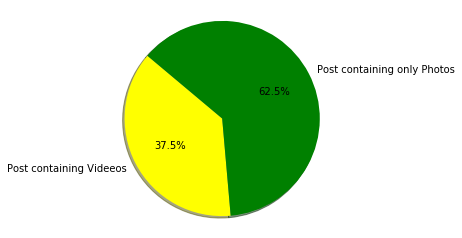

In [25]:
labels = "Post containing Videeos", "Post containing only Photos"
sizes = [1000-post_without_video, post_without_video]
plt.pie(sizes, explode=(0,0), labels=labels, colors=['yellow', 'green'],autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## WordCloud of 200 most famous tweets

Formula used by me = number_of_comments*5 + number_of_likes

In [26]:
popularity_post = []
a = 0
for i in range(len(des_BJP)):
    if des_BJP[i][1][-1] == 'k':
        p = (int)(1000*(float)(des_BJP[i][1][-2]))
    else:
        p = (int)(des_BJP[i][1])
    a = (int)(p) + (5*(int)((int)(des_BJP[i][2])))
    popularity_post.append(a)

In [28]:
import heapq
larg_200 = heapq.nlargest(200, popularity_post)
indices_lis = [popularity_post.index(elem) for elem in larg_200]

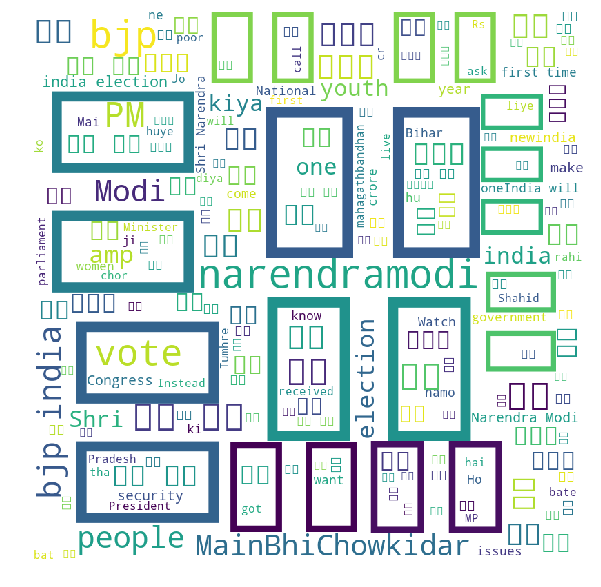

In [31]:
def generateWordClouds():
    comment_words = ' '
    stopwords = set(STOPWORDS)
    
    for i in range(200):
        temp = str(description_BJP[indices_lis[i]])        
        tokens = temp.split()
        if len(tokens) == 0:
            continue
        else:
            comment_words +=' '.join(tokens[1:])
            
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
    
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show()

generateWordClouds()

## 5 most used hashtags

In [44]:
hashtag = {}
for i in range(len(des_BJP)):
    hashtag[des_BJP[i][0]] = des_BJP[i][4].strip('[').strip(']').split(',')

In [45]:
hashCount = {}
for i in hashtag:
    for j in hashtag[i]:
        index = j.strip().strip("'")
        hashCount[index] = 0
        
for i in hashtag:
    for j in hashtag[i]:
        index = j.strip().strip("'")
        hashCount[index] += 1

In [46]:
reverse_sorted_dict = sorted(hashCount, key=hashCount.get, reverse=True)
print(reverse_sorted_dict[0:5])

['#BJP', '#governance', '#bjp', '#india', '#election']
